# 다음 댓글

* 영화씨가 가져온 파일 -> txt로 변경
* 시간전 찾기
* 해당 뒷 부분 인덱스 파일을 댓글로 가져오기
* 긍정 코멘트 / 부정 코멘트 나누기


In [1]:
import re
import nltk
import datetime
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager
from konlpy.tag import Twitter
import pandas as pd
from konlpy.tag import Twitter


In [2]:
font_dirs = ['./NanumBarunGothic.ttf']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)


sns.set(font_scale=1.2)
# set font
plt.rcParams['font.family'] = 'NanumBarunGothic'
font_path = '../NanumBarunGothic.ttf'


In [3]:
fname = "../dataset/first_feed.txt"

with open(fname, "r") as f:
    lines = f.readlines()

In [4]:
feeds_dict = {}
p = re.compile("[0-9]+")

for idx, line in enumerate(lines):
    if "시간전" in line:
        start_idx = idx+1
    elif "답글" in line:
        end_idx = idx
        feed = " ".join(lines[start_idx : end_idx])
        feed = feed.replace("\n", "")
        res = p.findall(line)
        
        anwser = 0
        if len(res) > 2 :
            anwser, likes, dislikes = res[0], res[1], res[2]
        elif len(res) == 2:
            likes, dislikes = res[0], res[1]
        
        feeds_dict[feed] = {"anwser": anwser, "likes": likes, "dislikes" : dislikes}

In [5]:
# WordCloud Previous and now
t = Twitter()


/home/nakyil/anaconda3/envs/DLassn/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [6]:
all_feed = list(feeds_dict.keys())
all_feed = " ".join(all_feed)

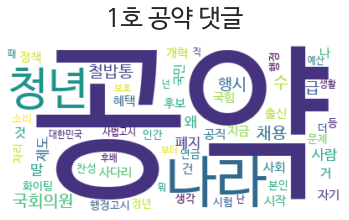

In [114]:
tokens = t.nouns(all_feed)
ko = nltk.Text(tokens, name="뉴스 기사")
data = ko.vocab().most_common(60)
data = data[2:]
wc = WordCloud(font_path=font_path, 
               background_color="white", max_words=1000,max_font_size=300).generate_from_frequencies(dict(data))
plt.title("1호 공약 댓글", fontsize=25, pad=20)
plt.imshow(wc, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.savefig("공약.png")

In [8]:
df = pd.DataFrame.from_dict(feeds_dict, orient="index")
df.reset_index(inplace=True)
df.columns = ["text", "anwser", "likes", "dislikes"]
df['likes'] = df['likes'].map(int)
df['dislikes'] = df['dislikes'].map(int)

In [9]:
## Likes 
df_plot = df.sort_values("likes", ascending=False).iloc[:5]
df_plot_dislike = df.sort_values("dislikes", ascending=False).iloc[:5]


In [10]:

df_plot_dislike

,text,anwser,likes,dislikes
16,넌 안된다는거 알면서도 왜 나오는거냐? 스스로도 알텐데 말이야,12,232,146
14,집에가서 잠이나 자라,3,215,95
2,난 김동연 이사람이 참 합리적인 사람으로보여.근디 혼자서는 힘든데.그래도 윤씨나 최...,10,633,91
8,직급 계급 건너뛰는 제도 전부 없애라 사관학교 경찰대 7급 5급 외시 행시 없...,24,355,89
5,김동연화이팅!!!! 이런 사람이 많이 나와서 대한민국을 바꾸어 놓아야 하는데 아...,12,443,86


Text(0.5, 1.0, '좋아요 많은 댓글')

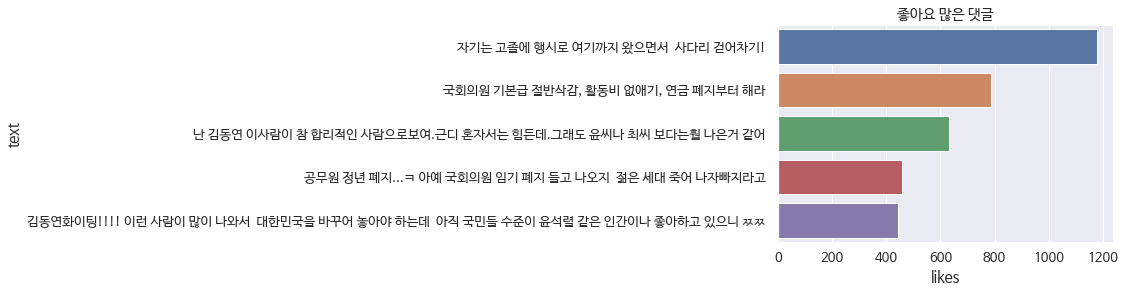

In [11]:


# 유투브 조회수
sns.barplot(x=df_plot['likes'], y=df_plot['text'])
plt.title("좋아요 많은 댓글")
#axes[0].set_title("좋아요가 많은 댓글")


# ## Temp
# sns.barplot(ax=axes[1], x=df_plot_dislike['likes'], y=df_plot_dislike['text'])
# axes[1].set_title("싫어요가 많은 댓글")
# #plt.savefig("../weekly_plots/2021-10-18/youtube_views.png", transparent=True)

# Sentiment
1. model load
2. 데이터 전처리

3. 긍정/ 부정 댓글 갯수 파악 -> 비율 파악

In [24]:
from ekonlpy.sentiment  import KSA
ksa = KSA()
tokens = ksa.tokenize(text)
score = ksa.get_score(tokens)

In [36]:
scores = {'Positive' : [], 'Negative' : [], 'Polarity' : [] , 'Subjectivity' :[]}

for text in df['text']:
    tokens = ksa.tokenize(text)
    score = ksa.get_score(tokens)
    scores["Positive"].append(score["Positive"])
    scores["Negative"].append(score["Negative"])
    scores["Polarity"].append(score["Polarity"])
    scores["Subjectivity"].append(score["Subjectivity"])
    

In [43]:
df["pos_score"] = scores['Positive']
df["neg_score"] = scores["Negative"]
df["sent_score"] = df["pos_score"] + df["neg_score"]

In [50]:
## 긍정 갯수 ## 부정 갯수
pos_score = sum(df["sent_score"] >= 0)
neg_score = sum(df["sent_score"] < 0 )

Text(0.5, 1.0, '긍정/부정 댓글 비율')

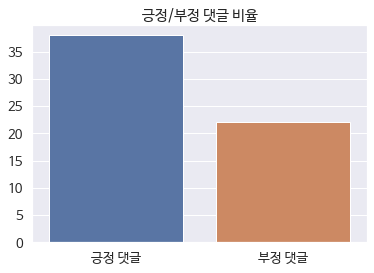

In [54]:
sns.barplot(x=["긍정 댓글", "부정 댓글"], y=[pos_score, neg_score])
plt.title("긍정/부정 댓글 비율") 

In [75]:
pos_score / (pos_score + neg_score)

0.6333333333333333

In [99]:
df_plot = df.sort_values("likes", ascending=False)

In [95]:
df_plot['text'] = df_plot['text'].map(lambda x : x[:30])

In [100]:
df_plot = df_plot.reset_index()

In [101]:
df_plot

,index,text,anwser,likes,dislikes,pos_score,neg_score,sent_score
0,0,자기는 고졸에 행시로 여기까지 왔으면서 사다리 걷어차기!,19,1179,82,2,-3,-1
1,1,"국회의원 기본급 절반삭감, 활동비 없애기, 연금 폐지부터 해라",2,788,9,5,-2,3
2,2,난 김동연 이사람이 참 합리적인 사람으로보여.근디 혼자서는 힘든데.그래도 윤씨나 최...,10,633,91,10,-7,3
3,3,공무원 정년 폐지...ㅋ 아예 국회의원 임기 폐지 들고 나오지 젊은 세대 죽어 나...,17,459,41,3,-5,-2
4,5,김동연화이팅!!!! 이런 사람이 많이 나와서 대한민국을 바꾸어 놓아야 하는데 아...,12,443,86,10,-12,-2
5,6,●공무원 철밥통은 깨야한다. ●공무원의 복지부동이 나라 밍친다. ●꼬옥~실천해주세요,2,414,80,6,-4,2
6,4,건들지 말아야 할 공직사회를 건드리시다니...용감합니다.,4,383,12,2,-3,-1
7,8,직급 계급 건너뛰는 제도 전부 없애라 사관학교 경찰대 7급 5급 외시 행시 없...,24,355,89,4,-1,3
8,7,이분은 그래도 양심과 도덕적이지 윤석열 최재형 은 직을 이용해 출세하려고,1,352,57,9,-2,7
9,9,실망이다 국민들은 힘들고 어려운데 공무원이 너무많고 예산 낭비다. 국민을 생각...,8,285,69,13,-11,2


In [102]:
df_good = df_plot.iloc[[1,2,3,5,6,8]]
df_bad = df_plot.iloc[[0,9,12,13,18,22]]

In [93]:
df_bad

,text,anwser,likes,dislikes,pos_score,neg_score,sent_score
28,지는 다 해쳐먹고 없앤다네,0,3,0,1,-3,-2
42,인구감소가 가속화되는 가운데 공무원의 숫자를 줄이는 정,0,2,0,18,-21,-3
34,대한민국 집값 상승의 주범이 김동연인데…. 이자를 찬영,0,2,0,11,-9,2
29,"굿!!! 공무원 연금, 군인 연금, 군인 혜택도 모두",0,3,0,3,-1,2
37,공무원 축소 ~ 찬성,0,2,0,1,-1,0
39,공무원 신분보장 조항이 왜 있는지 모르네...부당한 압,0,2,0,11,-9,2


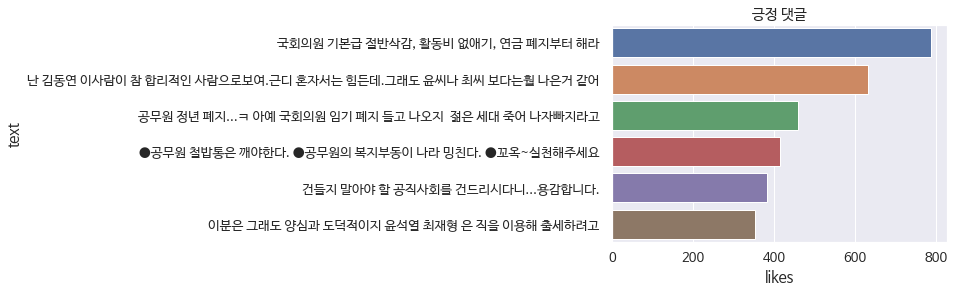

In [112]:

sns.barplot(x=df_good['likes'], y=df_good['text'])
plt.title("긍정 댓글")
plt.savefig("긍정.png")

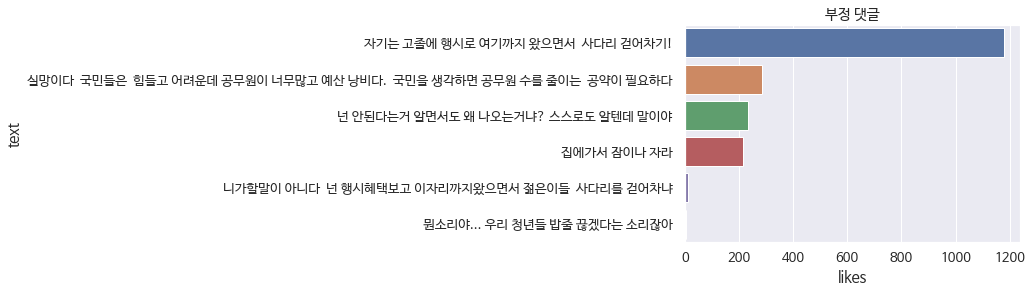

In [113]:

sns.barplot(x=df_bad['likes'], y=df_bad['text'])
plt.title("부정 댓글")
plt.savefig("부정.png")

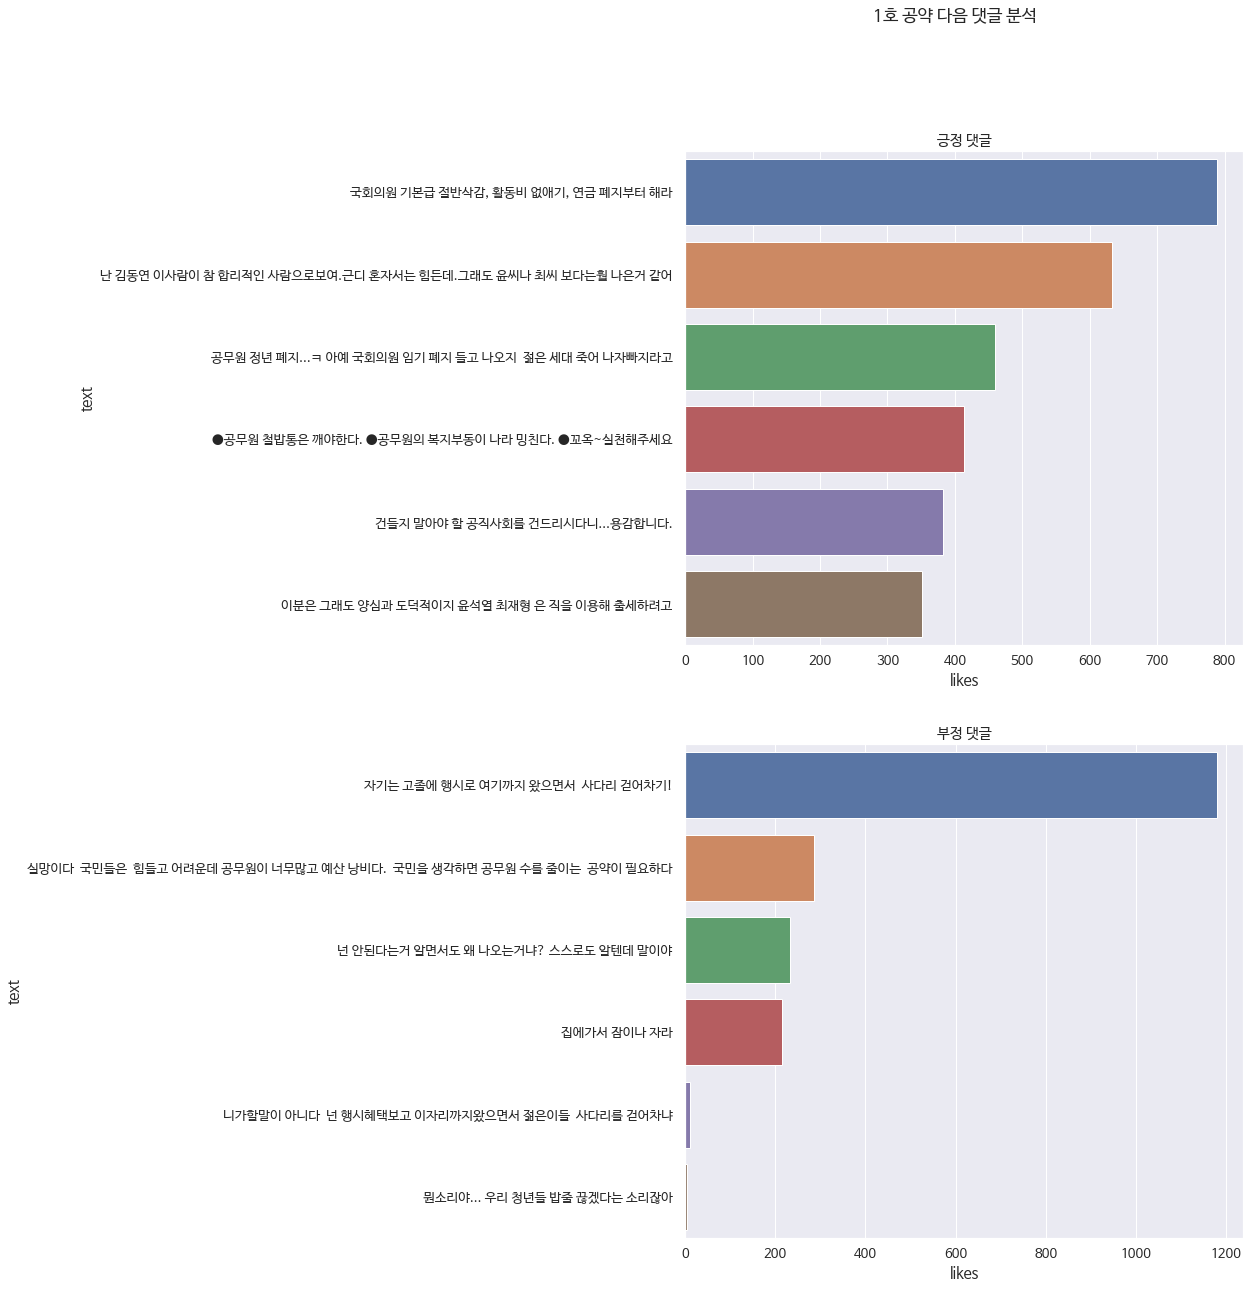

In [110]:
fig, axes = plt.subplots(2,1, figsize=(10,20))
fig.suptitle("1호 공약 다음 댓글 분석")
plt.subplots_adjust(wspace=0.8)

sns.barplot(ax=axes[0], x=df_good['likes'], y=df_good['text'])
axes[0].set_title("긍정 댓글")


sns.barplot(ax=axes[1], x=df_bad['likes'], y=df_bad['text'])
axes[1].set_title("부정 댓글")
plt.savefig("공약 댓글.png")

In [ ]:
sns.barplot(ax=axes[0], x=["긍정 댓글", "부정 댓글"], y=[pos_score, neg_score])
axes[0].set_title("긍정/부정 댓글 비율")
axes[0].text(0, pos_score, str(pos_score), ha='center')
axes[0].text(1, neg_score, str(neg_score), ha='center')
